In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
from random import randint
from copy import deepcopy
import pickle as pkl
import argparse
import pandas as pd

from torch import nn
from models import AutoEncoder, AutoEncoderSimple, load_model
import torch.nn.functional as F

sys.path.append('../../src')
sys.path.append('../../src/vae')
sys.path.append('../../src/vae/models')
sys.path.append('../../src/dsets/cosmology')
from dset import get_dataloader
from model import init_specific_model
from losses import get_loss_f, _reconstruction_loss
from training import Trainer
from viz import viz_im_r, cshow, viz_filters
from sim_cosmology import p

sys.path.append('../../lib/trim')
# trim modules
from trim import DecoderEncoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# seed
random.seed(p.seed)
np.random.seed(p.seed)
torch.manual_seed(p.seed)

# get dataloaders
train_loader = get_dataloader(p.data_path, 
                              batch_size=p.train_batch_size)
im = iter(train_loader).next()[0].to(device)[0:1]

In [25]:
h_channels = []
recons = []
filters = []
actmaps = []

# load results
dir_name = "vary_h_channels_seed=13"
out_dir = opj("/home/ubuntu/local-vae/notebooks/ex_cosmology/results", dir_name)
fnames = sorted(os.listdir(out_dir))

for fname in fnames:
    if fname[-3:] == 'pkl':
        results = pkl.load(open(opj(out_dir, fname), 'rb'))
        hc = results['h_channels']
        h_channels.append(hc)
    if fname[-3:] == 'pth':
        model = AutoEncoderSimple(img_size=p.img_size, hid_channels=hc).to(device) 
        model.load_state_dict(torch.load(opj(out_dir, fname)))
        recons.append(model(im)[0])
        filters.append(model.conv1.weight)
        actmaps.append(model.encoder(im))


## Plotting results

In [230]:
idx = 35

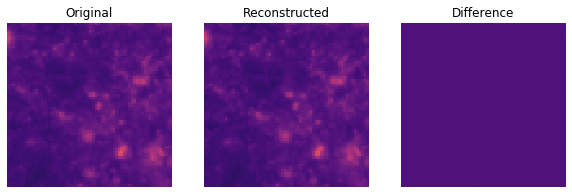

In [231]:
viz_im_r(im[0,0], recons[idx][0,0])

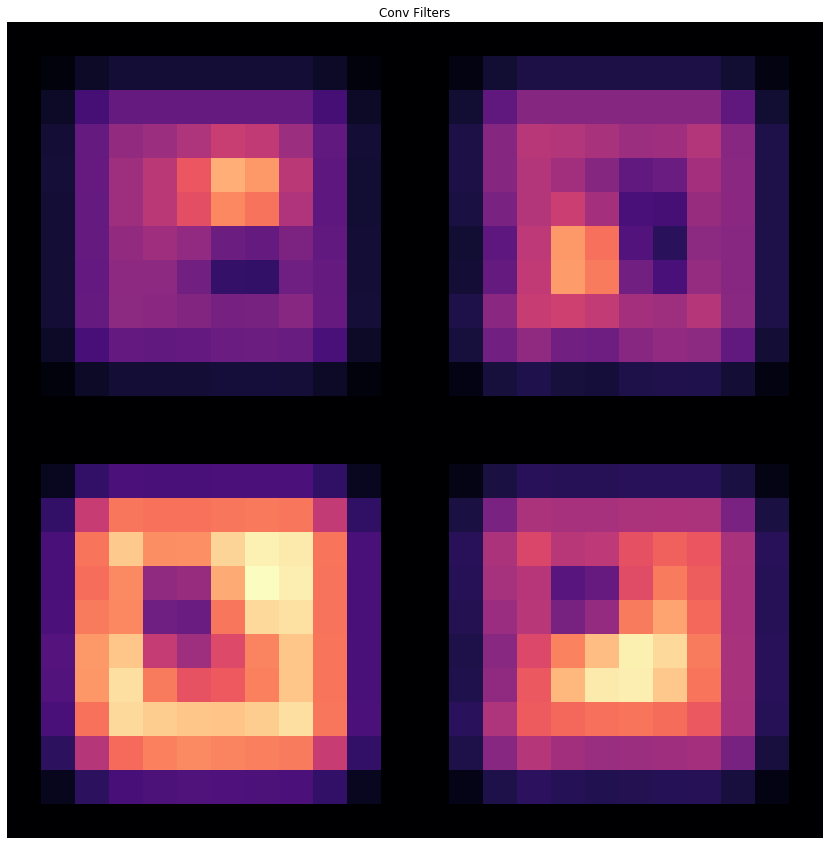

In [232]:
viz_filters(filters[idx], n_row=2, n_col=int(h_channels[idx]/2), resize_fac=2, normalize=True, title='Conv Filters')

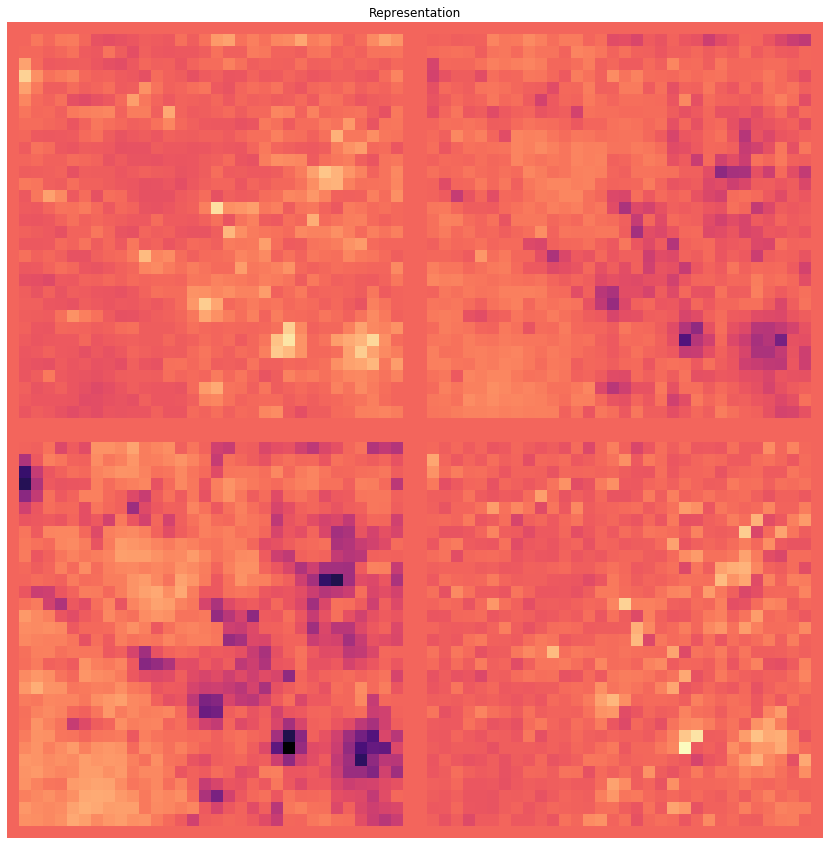

In [233]:
viz_filters(actmaps[idx][0], n_row=2, n_col=int(h_channels[idx]/2), normalize=False, resize_fac=1, title='Representation')